<a href="https://colab.research.google.com/github/404himel/CNN/blob/main/Plant_Diseases_classification_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

cp: cannot stat '/content/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:29<00:00, 207MB/s]
100% 2.70G/2.70G [00:29<00:00, 97.1MB/s]


In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(224, 224),

)
valid_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(224, 224),

)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)

In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
vgg.output

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_18>

In [ ]:
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
prediction = Dense(38, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 41,106,438 (156.81 MB)

 Trainable params: 26,391,750 (100.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history=model.fit(train_ds,epochs=10,
                  validation_data=valid_ds

                 )

Epoch 1/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 460s 393ms/step - accuracy: 0.4706 - loss: 1.8493 - val_accuracy: 0.8701 - val_loss: 0.3852
Epoch 2/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 426s 347ms/step - accuracy: 0.8979 - loss: 0.3111 - val_accuracy: 0.9136 - val_loss: 0.2676
Epoch 3/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 381s 347ms/step - accuracy: 0.9332 - loss: 0.2017 - val_accuracy: 0.9134 - val_loss: 0.2711
Epoch 4/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 373s 340ms/step - accuracy: 0.9526 - loss: 0.1444 - val_accuracy: 0.9331 - val_loss: 0.2318
Epoch 5/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 382s 339ms/step - accuracy: 0.9632 - loss: 0.1173 - val_accuracy: 0.9241 - val_loss: 0.2469
Epoch 6/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 372s 339ms/step - accuracy: 0.9674 - loss: 0.1002 - val_accuracy: 0.9449 - val_loss: 0.2086
Epoch 7/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 383s 339ms/step - accuracy: 0.9733 - loss: 0.0858 - val_accuracy: 0.9364 - val_loss: 0.2556
Epoch 8/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 382s 339ms/step - ac

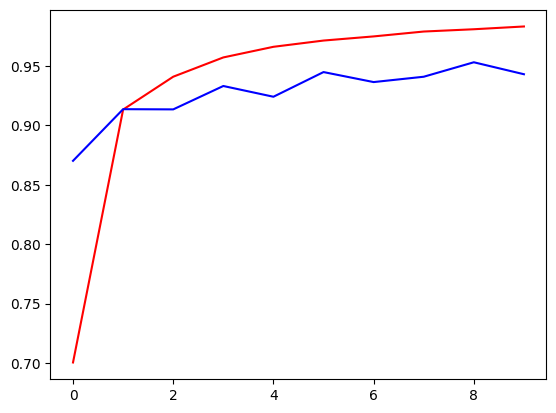

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train') # label was misspelled as lable
plt.plot(history.history['val_accuracy'],color='blue',label='validation') #Corrected the typo here as well and fixed another typo: histroy -> history
plt.show()

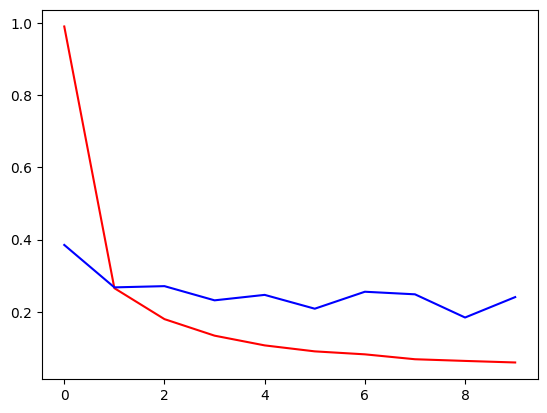

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train') # Changed 'lable' to 'label'
plt.plot(history.history['val_loss'],color='blue',label='validation') # Changed 'histroy' to 'history' and 'lable' to 'label'
plt.show()

In [ ]:
import tensorflow as tf # Import tensorflow

test_ds = tf.keras.utils.image_dataset_from_directory( # Load the dataset from directory
    '/content/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224), # Change image size to 224x224 to match the model's input shape
    shuffle=False,
    batch_size=64
)

model.evaluate(test_ds) # Evaluate the model

Found 33 files belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.2727 - loss: 479.0412


[479.0412292480469, 0.27272728085517883]

In [ ]:
y_predicted = model.predict(test_ds)
y_predicted[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


array([8.3046802e-34, 1.0000000e+00, 2.5735687e-40, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.2481052e-37, 7.0720187e-23, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

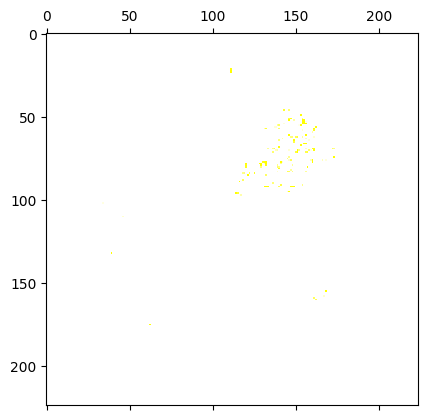

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Iterate over the dataset and access elements
for images, labels in test_ds.take(1):  # Take only the first batch
  plt.matshow(images[0]) # Display the first image
  plt.show()

In [ ]:
import numpy as np # import the numpy module and assign it to the alias np

y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
import numpy as np # import the numpy module and assign it to the alias np

y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Extract true labels from the test dataset
y_true_labels = []
for images, labels in test_ds:
  y_true_labels.extend(labels.numpy().flatten())

cm = tf.math.confusion_matrix(labels=y_true_labels, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(33, 33), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 9, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>